<a href="https://colab.research.google.com/github/rajivmdd/Kaggle_Temperature/blob/main/Temperature_kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data Set Url:**  https://bit.ly/3QzIb8G


---


**Library to be installed. Copy one by one line in CMD Prompt**

pip install pyspark

pip install pandas

pip install wheel

pip install numpy

pip install seaborn

pip install plotly-express 


---


**System Requirement**

8GB RAM

i5 any generation

JAVA 8 installed


In [49]:
!pip install pyspark


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Importing used Library**

In [50]:
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("test").getOrCreate()
spark
import pandas as pd
import numpy as np
import plotly as plty
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

**Reading CSV File with First row as Header**

In [51]:
df = spark.read.csv('/content/drive/MyDrive/Colab Notebooks/Data Files/city_temperature.csv',header= True, inferSchema= True)

In [52]:
df.show()

+------+-------+-----+-------+-----+---+----+--------------+
|Region|Country|State|   City|Month|Day|Year|AvgTemperature|
+------+-------+-----+-------+-----+---+----+--------------+
|Africa|Algeria| null|Algiers|    1|  1|1995|          64.2|
|Africa|Algeria| null|Algiers|    1|  2|1995|          49.4|
|Africa|Algeria| null|Algiers|    1|  3|1995|          48.8|
|Africa|Algeria| null|Algiers|    1|  4|1995|          46.4|
|Africa|Algeria| null|Algiers|    1|  5|1995|          47.9|
|Africa|Algeria| null|Algiers|    1|  6|1995|          48.7|
|Africa|Algeria| null|Algiers|    1|  7|1995|          48.9|
|Africa|Algeria| null|Algiers|    1|  8|1995|          49.1|
|Africa|Algeria| null|Algiers|    1|  9|1995|          49.0|
|Africa|Algeria| null|Algiers|    1| 10|1995|          51.9|
|Africa|Algeria| null|Algiers|    1| 11|1995|          51.7|
|Africa|Algeria| null|Algiers|    1| 12|1995|          51.3|
|Africa|Algeria| null|Algiers|    1| 13|1995|          47.0|
|Africa|Algeria| null|Al

**Describing dataset**

In [53]:
df.describe()

DataFrame[summary: string, Region: string, Country: string, State: string, City: string, Month: string, Day: string, Year: string, AvgTemperature: string]

In [55]:
#df.write.parquet('/content/sample_data/temperature2')

**Saving dataset to Parquet formate for increasing efficiency of data retrival and in memory workflow (Using RAM only) by PySPARK**

In [56]:
df_p = spark.read.parquet('/content/sample_data/temperature2')

In [57]:
df_p.show()

+------+-------+-----+-------+-----+---+----+--------------+
|Region|Country|State|   City|Month|Day|Year|AvgTemperature|
+------+-------+-----+-------+-----+---+----+--------------+
|Africa|Algeria| null|Algiers|    1|  1|1995|          64.2|
|Africa|Algeria| null|Algiers|    1|  2|1995|          49.4|
|Africa|Algeria| null|Algiers|    1|  3|1995|          48.8|
|Africa|Algeria| null|Algiers|    1|  4|1995|          46.4|
|Africa|Algeria| null|Algiers|    1|  5|1995|          47.9|
|Africa|Algeria| null|Algiers|    1|  6|1995|          48.7|
|Africa|Algeria| null|Algiers|    1|  7|1995|          48.9|
|Africa|Algeria| null|Algiers|    1|  8|1995|          49.1|
|Africa|Algeria| null|Algiers|    1|  9|1995|          49.0|
|Africa|Algeria| null|Algiers|    1| 10|1995|          51.9|
|Africa|Algeria| null|Algiers|    1| 11|1995|          51.7|
|Africa|Algeria| null|Algiers|    1| 12|1995|          51.3|
|Africa|Algeria| null|Algiers|    1| 13|1995|          47.0|
|Africa|Algeria| null|Al

**Converting Pyspark dataframe to Pandas df**

In [58]:
pd_df = df_p.toPandas()

In [59]:
pd_df.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,None,Algiers,1,1,1995,64.2
1,Africa,Algeria,None,Algiers,1,2,1995,49.4
2,Africa,Algeria,None,Algiers,1,3,1995,48.8
3,Africa,Algeria,None,Algiers,1,4,1995,46.4
4,Africa,Algeria,None,Algiers,1,5,1995,47.9


In [60]:
pd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906327 entries, 0 to 2906326
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Region          object 
 1   Country         object 
 2   State           object 
 3   City            object 
 4   Month           int32  
 5   Day             int32  
 6   Year            int32  
 7   AvgTemperature  float64
dtypes: float64(1), int32(3), object(4)
memory usage: 144.1+ MB


***Checking Null Values***

In [61]:
pd_df.isna().sum()

Region                  0
Country                 0
State             1450990
City                    0
Month                   0
Day                     0
Year                    0
AvgTemperature          0
dtype: int64

***Total number of values in dataset***


In [62]:
pd_df.count()

Region            2906327
Country           2906327
State             1455337
City              2906327
Month             2906327
Day               2906327
Year              2906327
AvgTemperature    2906327
dtype: int64

***Dropping duplicate values***

In [63]:
pd_df = pd_df.drop_duplicates()

In [64]:
pd_df.count()

Region            2885612
Country           2885612
State             1436807
City              2885612
Month             2885612
Day               2885612
Year              2885612
AvgTemperature    2885612
dtype: int64

In [65]:
pd_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Month,2885612.0,6.469037,3.456445,1.0,3.0,6.0,9.0,12.0
Day,2885612.0,15.716792,8.800516,0.0,8.0,16.0,23.0,31.0
Year,2885612.0,2006.706835,19.657102,200.0,2001.0,2007.0,2013.0,2020.0
AvgTemperature,2885612.0,56.015596,32.152101,-99.0,45.8,62.5,75.6,110.0


**Identifying outliers**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass t

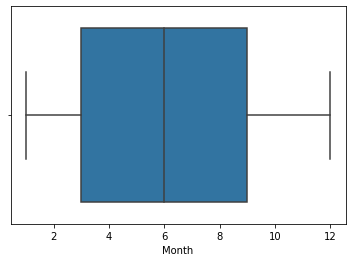

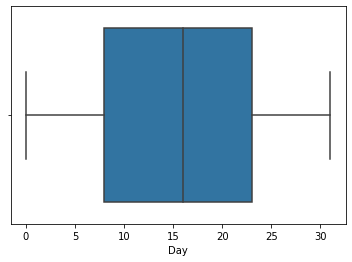

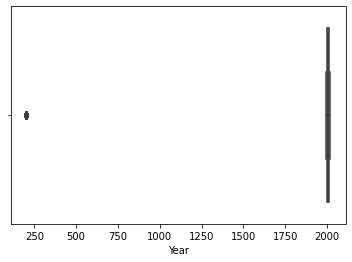

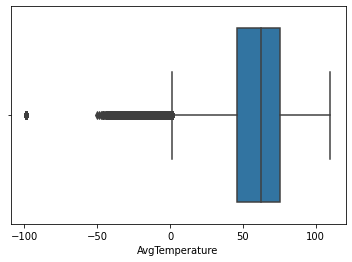

In [66]:
for i in pd_df[['Month', 'Day', 'Year', 'AvgTemperature']]:
  plt.figure()
  sns.boxplot(pd_df[i])

***From the Above Box Plot we can conculde that Year and Avg temperature is having lot of outliers***

In [67]:
#Let remove the outliers

pd_df.groupby(['Year'])['AvgTemperature'].count()

Year
200         60
201        235
1995    117886
1996    118218
1997    117926
1998    118352
1999    118625
2000    118950
2001    118625
2002    118625
2003    118410
2004    117913
2005    117165
2006    116917
2007    114685
2008    113831
2009    113517
2010    114533
2011    112313
2012    111261
2013    110291
2014    108288
2015    106768
2016    106505
2017    106216
2018    105660
2019    105295
2020     38542
Name: AvgTemperature, dtype: int64

In [68]:
temp2 = pd_df[(pd_df['Year']==200) | (pd_df['Year']==201)].index

In [69]:
temp2

Int64Index([  58178,   58179,   58180,   58181,   58182,   58183,   58184,
              58185,   58186,   58187,
            ...
            1212422, 1212423, 1212424, 1212425, 1212426, 1212427, 1212428,
            1212429, 1212430, 1212431],
           dtype='int64', length=295)

In [70]:
pd_df.drop(temp2, inplace = True)

In [71]:
pd_df.groupby(['Year'])['AvgTemperature'].count()

Year
1995    117886
1996    118218
1997    117926
1998    118352
1999    118625
2000    118950
2001    118625
2002    118625
2003    118410
2004    117913
2005    117165
2006    116917
2007    114685
2008    113831
2009    113517
2010    114533
2011    112313
2012    111261
2013    110291
2014    108288
2015    106768
2016    106505
2017    106216
2018    105660
2019    105295
2020     38542
Name: AvgTemperature, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass t

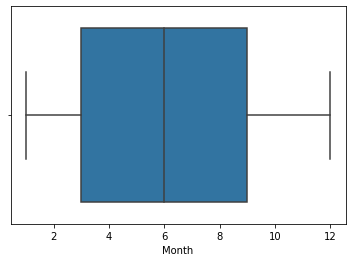

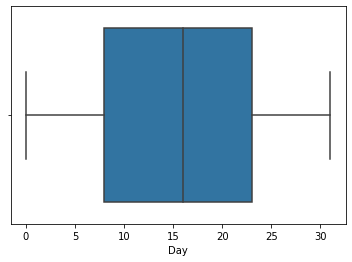

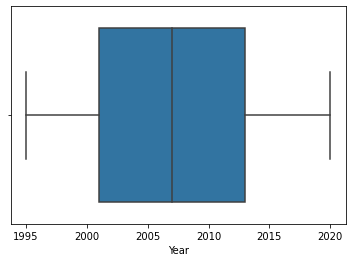

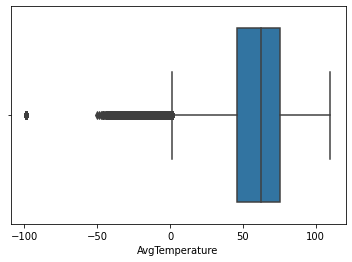

In [72]:
for i in pd_df[['Month', 'Day', 'Year', 'AvgTemperature']]:
  plt.figure()
  sns.boxplot(pd_df[i])

In [73]:
temp3 = pd_df[pd_df['AvgTemperature'] < 0].index

In [74]:
temp3

Int64Index([    220,     221,     408,     409,    1453,    1454,    1459,
               1460,    1470,    2725,
            ...
            2905333, 2905365, 2905372, 2905436, 2905459, 2905471, 2905534,
            2905689, 2905726, 2905749],
           dtype='int64', length=89575)

In [75]:
pd_df.drop(temp3 , inplace = True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass t

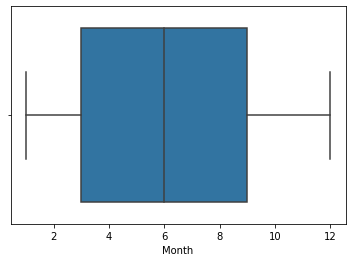

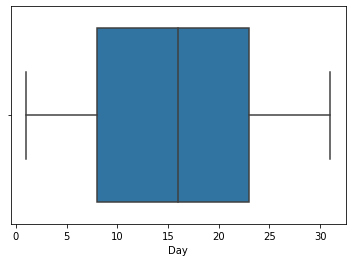

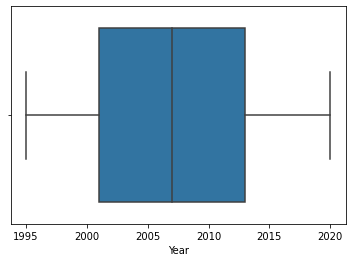

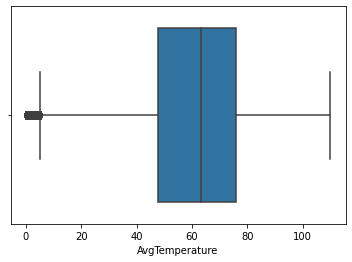

In [76]:
for i in pd_df[['Month', 'Day', 'Year', 'AvgTemperature']]:
  plt.figure()
  sns.boxplot(pd_df[i])

In [77]:
temp4 = pd_df[pd_df['AvgTemperature'] < 10].index

pd_df.drop(temp4 , inplace= True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass t

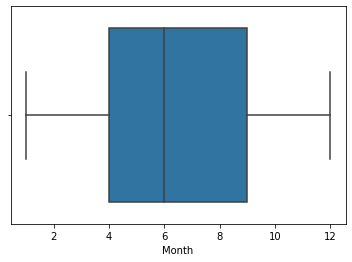

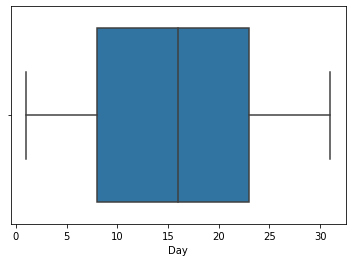

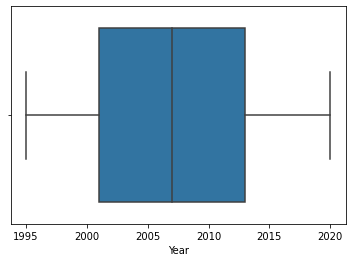

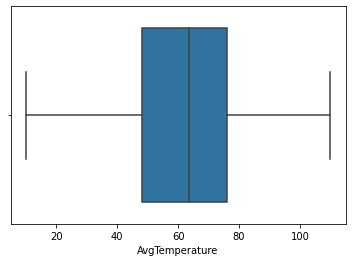

In [78]:
for i in pd_df[['Month', 'Day', 'Year', 'AvgTemperature']]:
  plt.figure()
  sns.boxplot(pd_df[i])

In [79]:
pd_df.count()

Region            2776834
Country           2776834
State             1414218
City              2776834
Month             2776834
Day               2776834
Year              2776834
AvgTemperature    2776834
dtype: int64

**Creating Data for India Only**

In [80]:
India_df = pd_df[ pd_df['Country'] =='India']

In [81]:
India_df

,Region,Country,State,City,Month,Day,Year,AvgTemperature
312523,Asia,India,None,Bombay (Mumbai),1,1,1995,71.8
312524,Asia,India,None,Bombay (Mumbai),1,2,1995,72.0
312525,Asia,India,None,Bombay (Mumbai),1,3,1995,70.3
312526,Asia,India,None,Bombay (Mumbai),1,4,1995,69.7
312527,Asia,India,None,Bombay (Mumbai),1,5,1995,71.3
...,...,...,...,...,...,...,...,...
349581,Asia,India,None,Delhi,5,8,2020,89.9
349582,Asia,India,None,Delhi,5,9,2020,92.3
349583,Asia,India,None,Delhi,5,10,2020,81.9
349584,Asia,India,None,Delhi,5,11,2020,84.7


**Cleaning chunk of data**

In [82]:
India_df['City'] = India_df['City'].replace('Bombay (Mumbai)', 'Mumbai')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [83]:
India_df

,Region,Country,State,City,Month,Day,Year,AvgTemperature
312523,Asia,India,None,Mumbai,1,1,1995,71.8
312524,Asia,India,None,Mumbai,1,2,1995,72.0
312525,Asia,India,None,Mumbai,1,3,1995,70.3
312526,Asia,India,None,Mumbai,1,4,1995,69.7
312527,Asia,India,None,Mumbai,1,5,1995,71.3
...,...,...,...,...,...,...,...,...
349581,Asia,India,None,Delhi,5,8,2020,89.9
349582,Asia,India,None,Delhi,5,9,2020,92.3
349583,Asia,India,None,Delhi,5,10,2020,81.9
349584,Asia,India,None,Delhi,5,11,2020,84.7


In [84]:
India_df.groupby('City')['Country'].count()

City
Calcutta            9225
Chennai (Madras)    9237
Delhi               9205
Mumbai              9236
Name: Country, dtype: int64

In [85]:
India_df['City'] = India_df['City'].replace('Chennai (Madras)', 'Chennai')
India_df['City'] = India_df['City'].replace('Calcutta', 'Kolkata')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [86]:
India_df

,Region,Country,State,City,Month,Day,Year,AvgTemperature
312523,Asia,India,None,Mumbai,1,1,1995,71.8
312524,Asia,India,None,Mumbai,1,2,1995,72.0
312525,Asia,India,None,Mumbai,1,3,1995,70.3
312526,Asia,India,None,Mumbai,1,4,1995,69.7
312527,Asia,India,None,Mumbai,1,5,1995,71.3
...,...,...,...,...,...,...,...,...
349581,Asia,India,None,Delhi,5,8,2020,89.9
349582,Asia,India,None,Delhi,5,9,2020,92.3
349583,Asia,India,None,Delhi,5,10,2020,81.9
349584,Asia,India,None,Delhi,5,11,2020,84.7


In [87]:
India_df.groupby('City')['Country'].count()

City
Chennai    9237
Delhi      9205
Kolkata    9225
Mumbai     9236
Name: Country, dtype: int64

In [88]:
In_df1 = India_df.groupby(['City', 'Year']).mean()

In [97]:
In_df1

Month        Day  AvgTemperature
City    Year                                     
Chennai 1995  6.537190  15.666667       82.625895
        1996  6.504110  15.728767       82.612877
        1997  6.526027  15.720548       83.383836
        1998  6.461111  15.588889       84.006944
        1999  6.541209  15.736264       83.254670
...                ...        ...             ...
Mumbai  2016  6.510989  15.785714       82.832967
        2017  6.526027  15.720548       83.404384
        2018  6.488950  15.723757       83.754696
        2019  6.565460  15.657382       82.854318
        2020  2.738806  14.798507       82.382090

[104 rows x 3 columns]

In [102]:
data4 = India_df[['Country','City','Year','AvgTemperature']].groupby(['Country','City','Year']).mean().reset_index()


px.choropleth(data_frame=data4,locations="Country",locationmode='country names',animation_frame="Year",color='AvgTemperature',color_continuous_scale = 'Turbo',title="Average temperature of Cities in India over the years 1995 to 2019")

**Back to World dataset**

In [89]:
data = pd_df[['Country', 'Year', 'AvgTemperature']]


In [90]:
data.head()

,Country,Year,AvgTemperature
0,Algeria,1995,64.2
1,Algeria,1995,49.4
2,Algeria,1995,48.8
3,Algeria,1995,46.4
4,Algeria,1995,47.9


In [91]:
data1 = data.groupby(['Country', 'Year']).mean()

In [92]:
data1.head()

AvgTemperature
Country Year                
Albania 1997       71.934783
        1998       61.612500
        1999       63.116961
        2000       63.176945
        2001       61.235600

In [93]:
data1.sort_values(by = ['Country' , 'Year'], inplace = True)

In [94]:
data1.head(100)

AvgTemperature
Country   Year                
Albania   1997       71.934783
          1998       61.612500
          1999       63.116961
          2000       63.176945
          2001       61.235600
...                        ...
Australia 2014       63.483956
          2015       63.063626
          2016       63.408223
          2017       63.455647
          2018       63.264100

[100 rows x 1 columns]

In [95]:
data3 = pd_df[['Country','Year','AvgTemperature']].groupby(['Country','Year']).mean().reset_index()


px.choropleth(data_frame=data3,locations="Country",locationmode='country names',animation_frame="Year",color='AvgTemperature',color_continuous_scale = 'Turbo',title="Average temperature of countries over the years 1995 to 2019")

In [96]:
pd_df = 

SyntaxError: ignored